Example 1

In [2]:
# Initial investment and expected profit
P_0 = 100  # Initial investment in million USD
E_0_X1 = 120  # Expected profit in million USD

# Expected payoff per dollar invested
expected_payoff_per_dollar = E_0_X1 / P_0

# Unexpected events
tilde_M1 = -0.05  # Macroeconomic downturn (5% negative shock)
tilde_C1 = 0.03   # Higher-than-anticipated carbon tax (3% additional cost)

# Sensitivity of the firm's profits to economic and carbon tax shocks
beta_m = 0.5
beta_c = -0.3

# Calculation of the unexpected payoff adjustment
unexpected_payoff_adjustment = (beta_m * tilde_M1) + (beta_c * tilde_C1)

# Actual payoff per dollar invested
actual_payoff_per_dollar = expected_payoff_per_dollar + unexpected_payoff_adjustment

# Actual end-of-period profit in dollar terms
actual_profit = actual_payoff_per_dollar * P_0

# Print results
print(f"Expected payoff per dollar invested: {expected_payoff_per_dollar}")
print(f"Unexpected payoff adjustment: {unexpected_payoff_adjustment}")
print(f"Actual payoff per dollar invested: {actual_payoff_per_dollar}")
print(f"Actual end-of-period profit: {actual_profit} million USD")
print(f"The investor in Gen-0 will earn {actual_profit}% on the investment at the end of the period.")


Expected payoff per dollar invested: 1.2
Unexpected payoff adjustment: -0.034
Actual payoff per dollar invested: 1.166
Actual end-of-period profit: 116.6 million USD
The investor in Gen-0 will earn 116.6% on the investment at the end of the period.


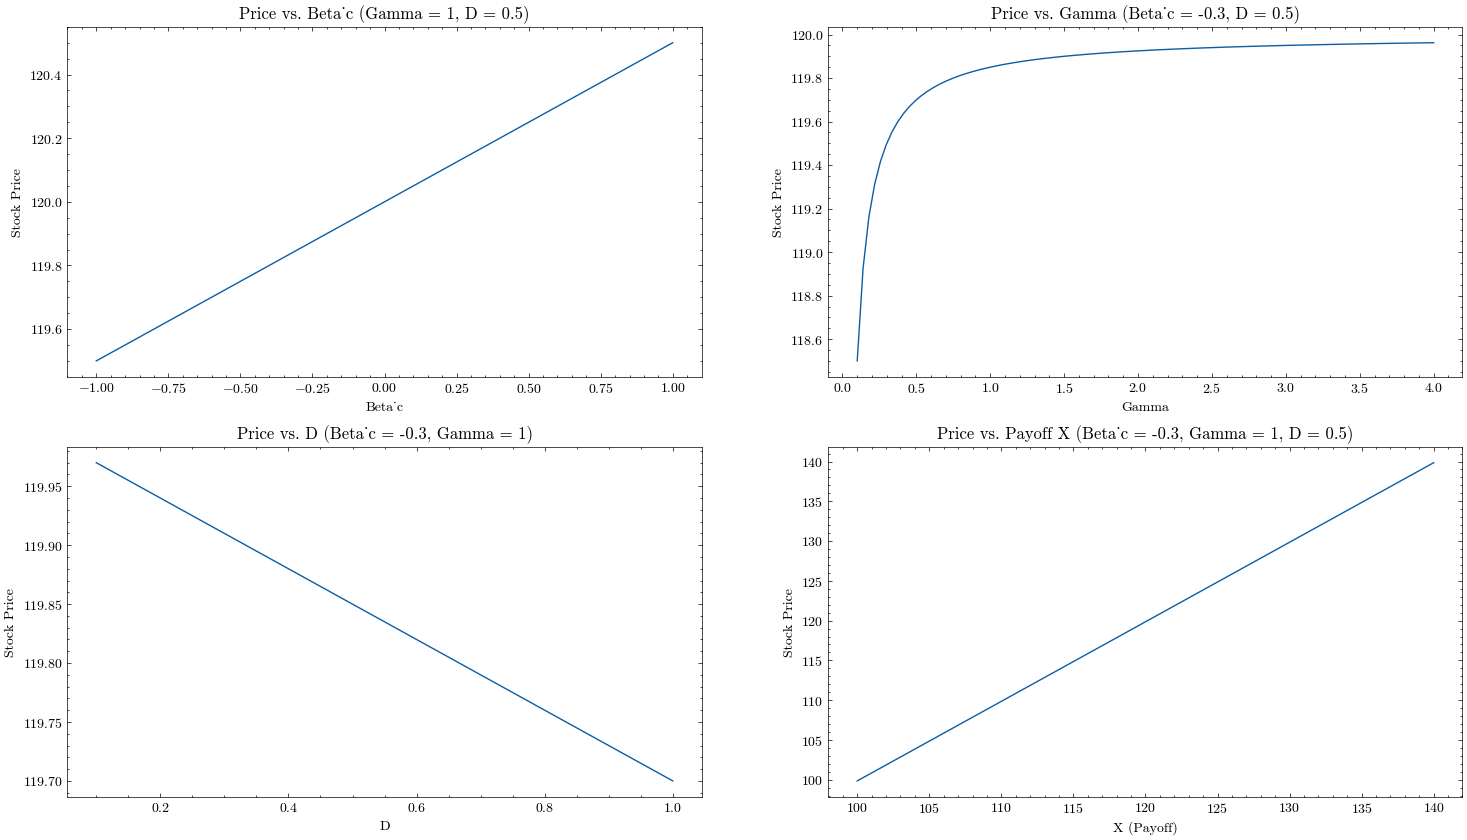

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(('science','no-latex'))
plt.rcParams['axes.unicode_minus'] = False

# Constants
X = 120  # Payoff, assumed constant for simplicity
D = 0.5  # Initial sensitivity to climate risk

# Variable ranges
beta_c_values = np.linspace(-1, 1, 100)  # Range of beta_c values from -1 to 1
gamma_values = np.linspace(0.1, 4, 100)  # Corrected range of gamma values from 0.1 to 10
D_values = np.linspace(0.1, 1, 100)  # Range of D values from 0.1 to 1
X_values = np.linspace(100, 140, 100)  # Range of payoff values from 100 to 140

# Calculate price as a function of beta_c, gamma, D, and X
def price(X, beta_c, gamma, D):
    return X + (beta_c * D / gamma)

# Plot configurations
plt.figure(figsize=(18, 10))

# Plot price vs. beta_c
plt.subplot(2, 2, 1)
prices = [price(X, beta_c, 1, D) for beta_c in beta_c_values]  # Using gamma = 1, D = 0.5
plt.plot(beta_c_values, prices)
plt.title('Price vs. Beta_c (Gamma = 1, D = 0.5)')
plt.xlabel('Beta_c')
plt.ylabel('Stock Price')

# Plot price vs. gamma
plt.subplot(2, 2, 2)
prices = [price(X, -0.3, gamma, D) for gamma in gamma_values]  # Using beta_c = -0.3, D = 0.5
plt.plot(gamma_values, prices)
plt.title('Price vs. Gamma (Beta_c = -0.3, D = 0.5)')
plt.xlabel('Gamma')
plt.ylabel('Stock Price')

# Plot price vs. D
plt.subplot(2, 2, 3)
prices = [price(X, -0.3, 1, D) for D in D_values]  # Using beta_c = -0.3, gamma = 1
plt.plot(D_values, prices)
plt.title('Price vs. D (Beta_c = -0.3, Gamma = 1)')
plt.xlabel('D')
plt.ylabel('Stock Price')

# Plot price vs. X (Payoff)
plt.subplot(2, 2, 4)
prices = [price(X, -0.3, 1, 0.5) for X in X_values]  # Using beta_c = -0.3, gamma = 1, D = 0.5
plt.plot(X_values, prices)
plt.title('Price vs. Payoff X (Beta_c = -0.3, Gamma = 1, D = 0.5)')
plt.xlabel('X (Payoff)')
plt.ylabel('Stock Price')

# plt.tight_layout()
plt.savefig('../images/chapter02/price_vs_parameters.png')
plt.show()


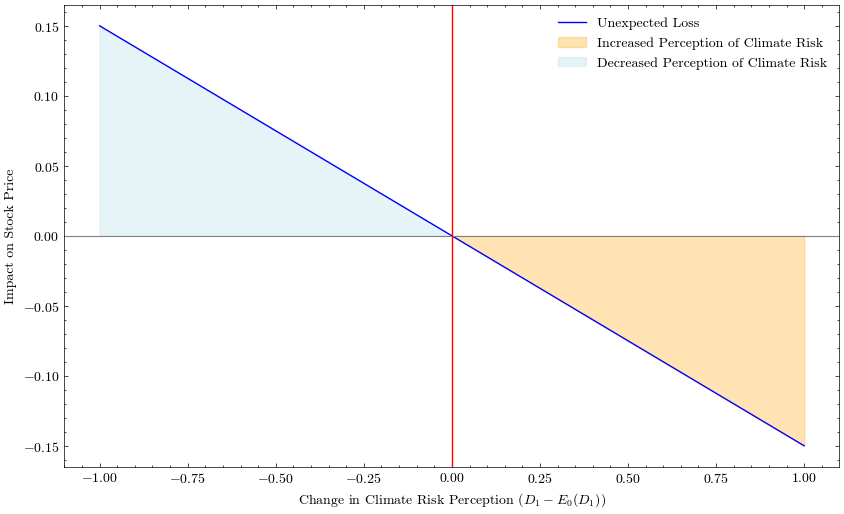

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
beta_c = -0.3  # Sensitivity of the stock price to climate risk
gamma = 2  # Investor risk aversion
X_1 = 120  # Expected payoff
epsilon_1 = 0  # Idiosyncratic shock, assumed to be zero for simplicity

# Range for changes in perceived climate risk sensitivity
D1_minus_E0_D1 = np.linspace(-1, 1, 100)  # Range from -1 to 1

# Calculate unexpected loss in stock price due to changes in climate risk perception
def unexpected_loss(D1_minus_E0_D1):
    return beta_c * (1 / gamma) * D1_minus_E0_D1 + epsilon_1

# Generate values for the unexpected loss
loss_values = unexpected_loss(D1_minus_E0_D1)

# Plotting the sensitivity
plt.figure(figsize=(10, 6))
plt.plot(D1_minus_E0_D1, loss_values, label='Unexpected Loss', color='blue')
# plt.title('Sensitivity of Stock Price to Shock in Climate Risk Perception')
plt.xlabel('Change in Climate Risk Perception $(D_1 - E_0(D_1))$')
plt.ylabel('Impact on Stock Price')
plt.axhline(0, color='gray', lw=0.8)  # Adding a horizontal line at zero for reference
plt.axvline(0, color='red', lw=1)  # Vertical line at zero to divide the perception changes

# Highlighting different perceptions of climate risk
plt.fill_between(D1_minus_E0_D1, loss_values, 0, where=(D1_minus_E0_D1 > 0), color='orange', alpha=0.3, label='Increased Perception of Climate Risk')
plt.fill_between(D1_minus_E0_D1, loss_values, 0, where=(D1_minus_E0_D1 < 0), color='lightblue', alpha=0.3, label='Decreased Perception of Climate Risk')

plt.legend()
# plt.grid(True)
plt.savefig('../images/chapter02/discount_price.png')
plt.show()
